In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

import datetime as dt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import seaborn as sns

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (20.0, 12.0)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 20 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(0.9912067651748657, 1.1490678986092462e-07)

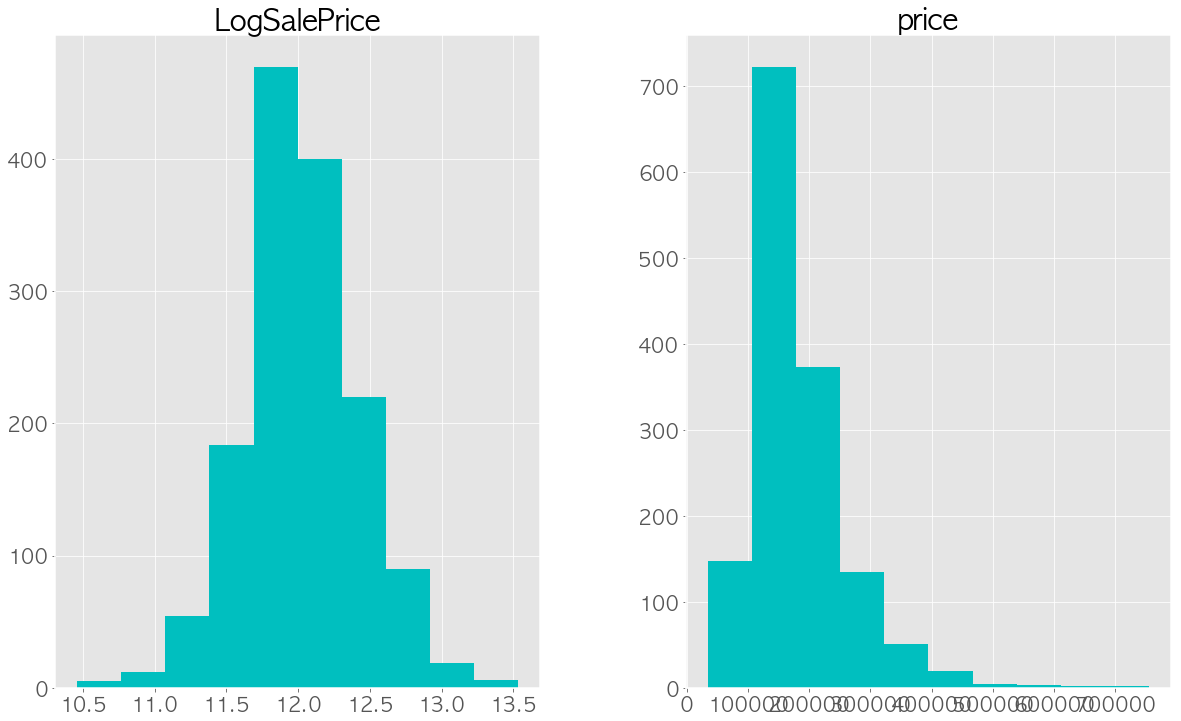

In [5]:
prices = pd.DataFrame({"price":train["SalePrice"], "LogSalePrice":np.log(train["SalePrice"])})

prices.hist(color="c") 
stats.shapiro(prices.LogSalePrice)

In [6]:
data = pd.DataFrame({"GrLivArea":train["GrLivArea"], "LogSalePrice":np.log(train["SalePrice"])})
data.head()
#train["LogSalePrice"] = np.log1p(train["SalePrice"])

,GrLivArea,LogSalePrice
0,1710,12.247694
1,1262,12.109011
2,1786,12.317167
3,1717,11.849398
4,2198,12.429216


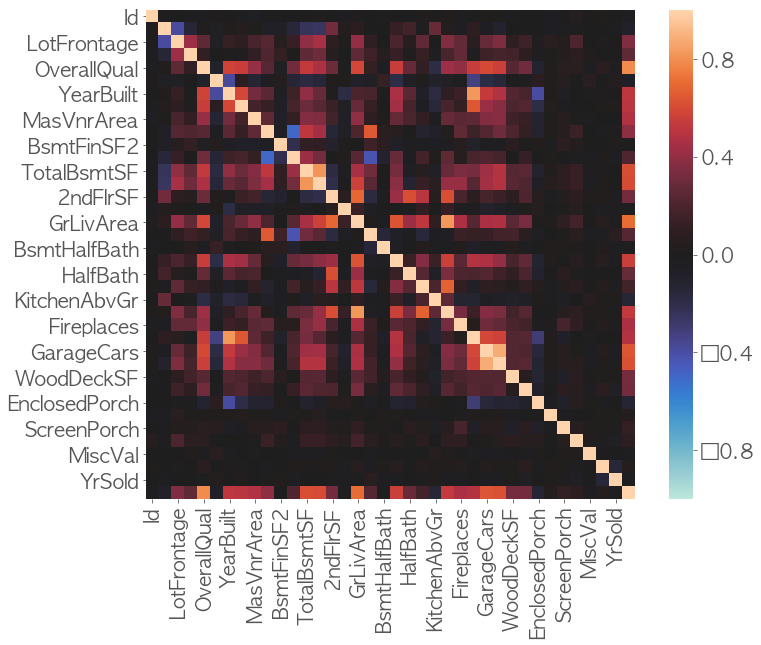

In [7]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(train.corr(), square=True, vmax=1, vmin=-1, center=0)

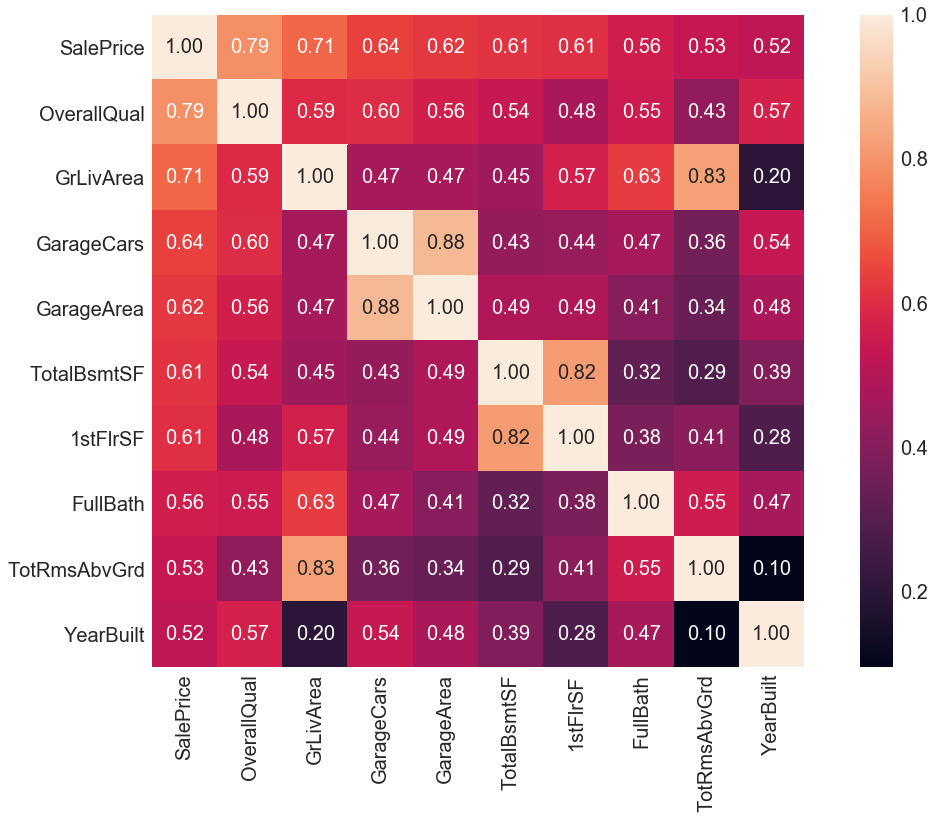

In [8]:
k = 10 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

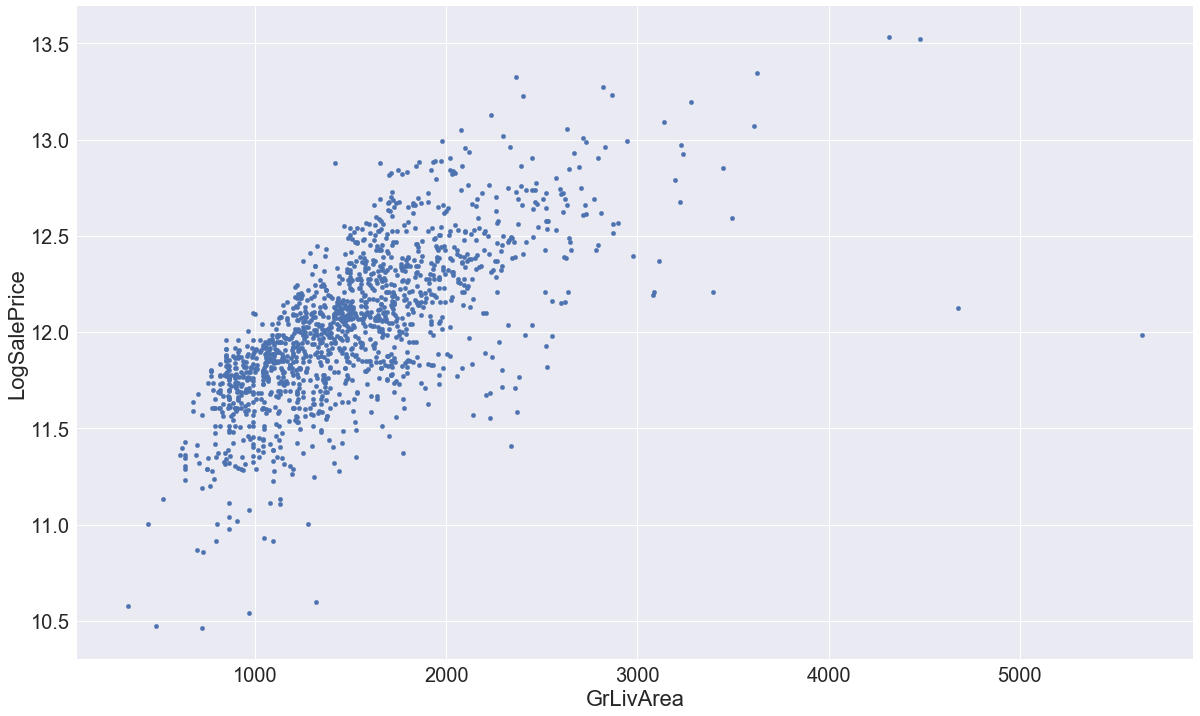

In [9]:
var = 'GrLivArea'

data["LogSalePrice"]= np.log(train['SalePrice'])
data[var]=  train[var]

data.head()
data.plot.scatter(x=var,y="LogSalePrice")

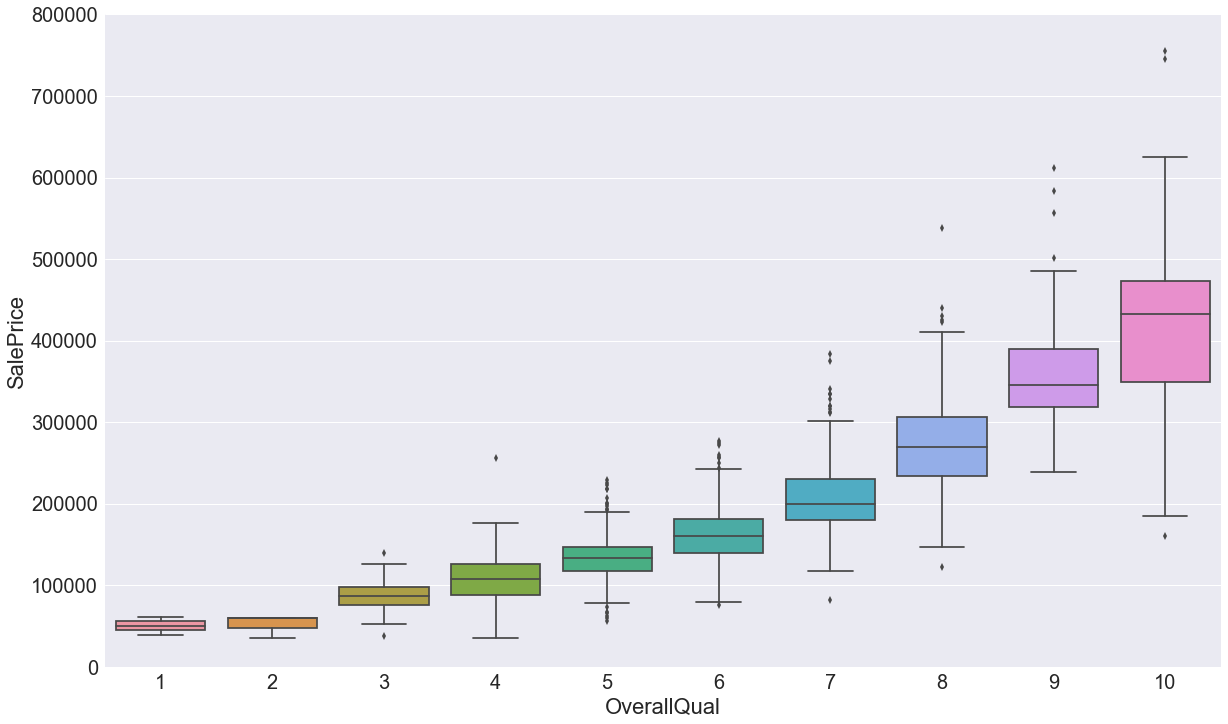

In [10]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
#f, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt
plt.ylim(0, 800000)
fig = sns.boxplot(x=var, y="SalePrice", data=data)